# **Imbalanced Data:** Handling Techniques
A classification data set with skewed class proportions is called imbalanced. 
* **Majority Class:** Classes that make up a large proportion of the dataset
* **Minority Class:** Classes that make up a smaller proportion of the dataset

### Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Importing Dataset

In [9]:
df = pd.read_parquet("creditcard.parquet")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Info

In [11]:
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

### Check for Missing Data

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Value Counts

In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Exploratory Data Analysis

In [19]:

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [ ]:
def plotting_pie(data):

    plt.pie(data, labels= ['Legit', 'Fraud'],
        colors=["purple", "orange"], startangle=270,autopct='%1.1f%%')

    plt.title('Legit vs Fraud Transactions')
    plt.show()

def plotting_hist(data):
    plt.hist(data)
    plt.title('Legit vs Fraud Transactions')
    plt.show()

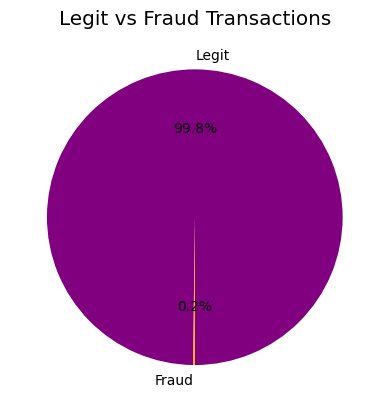

In [107]:
plotting_pie(df['Class'].value_counts())

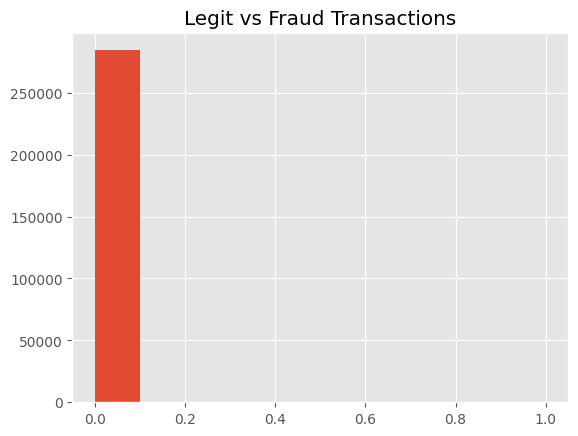

In [109]:
plotting_hist(df['Class'])

In [62]:
legit["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [58]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [59]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<AxesSubplot: >

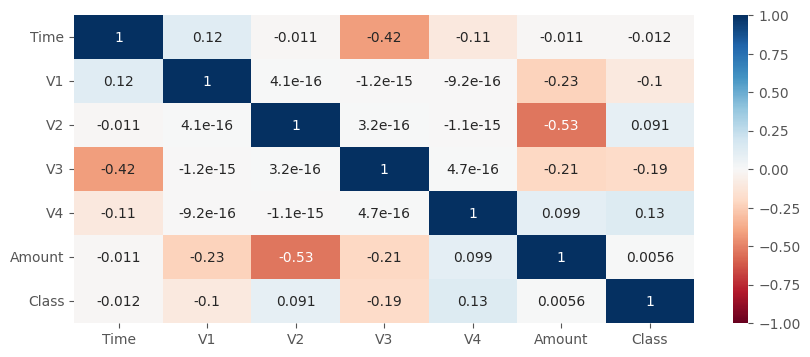

In [110]:
corr = df[['Time', 'V1', 'V2', 'V3', 'V4','Amount','Class']].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1 , annot=True)

### Model Development and Validation

In [113]:
def model_validation(X, y):
    model = LogisticRegression(max_iter=400)

    # Accuracy can be misleading in Imbalanced data, thus choosing F1 score
    cv = cross_val_score(model, X, y, cv=5, scoring="f1")
    print(f"F1 score: {np.mean(cv)}")
    

In [114]:
X = df.iloc[:,:30]
y = df.iloc[:,-1]

model_validation(X,y)

F1 score: 0.557630277846236


c:\Users\HAIER\miniconda3\envs\latest_python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## **Under-Sampling** majority class


In [115]:
legit_sample = legit.sample(n=len(fraud))

df_over = pd.concat([legit_sample, fraud], axis=0)
df_over.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70915,54074.0,1.078533,-0.133225,1.016189,1.369226,-0.665807,0.434181,-0.541383,0.341282,0.769392,...,-0.031468,0.233445,-0.046403,0.228858,0.541655,-0.300354,0.067810,0.011557,1.18,0
132614,80052.0,1.238324,0.176291,0.481177,0.526322,-0.293009,-0.540495,-0.009880,-0.203588,0.019866,...,-0.107302,-0.266531,-0.034316,-0.059192,0.372235,0.254471,-0.014131,0.022735,26.00,0
234586,148032.0,1.965913,-0.917187,-1.092232,0.321246,-0.222903,0.592550,-0.680191,0.102481,-0.400353,...,-0.303826,-0.451043,0.018930,-1.520936,-0.068486,-0.608545,0.048506,-0.040876,90.00,0
74848,55786.0,-2.046506,-0.780836,0.919701,0.746379,-0.783828,-0.823087,-1.223539,0.906122,0.334942,...,0.117037,-0.047499,-0.067173,0.518744,-1.196268,0.887965,-0.147246,-0.172916,29.12,0
209749,137688.0,1.990522,0.910710,-1.396585,3.678865,1.018428,-0.728437,0.897890,-0.428245,-1.647335,...,0.101523,0.338204,0.046060,-0.080127,0.303597,0.079445,-0.071740,-0.063755,2.28,0


In [116]:
df_over['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

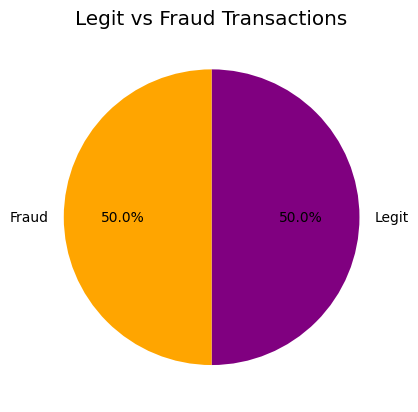

In [117]:
plotting_pie(df_over['Class'].value_counts())

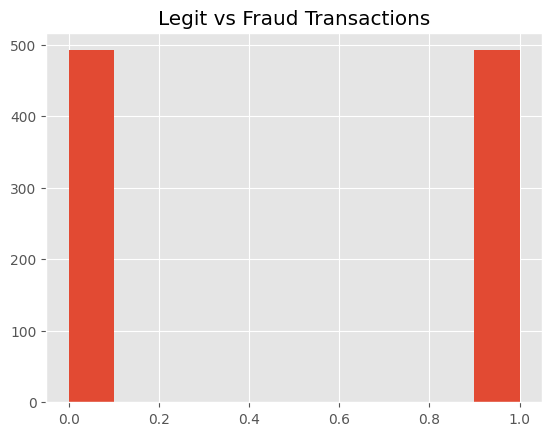

In [118]:
plotting_hist(df_over['Class'])

In [127]:
X = df_over.iloc[:,:30]
y = df_over.iloc[:,-1]

model_validation(X, y)

F1 score: 0.9337098315185057


---
## **Under-Sampling** majority class
